In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from rna_motif_library.plotting import publication_style_ax
from rna_motif_library.util import parse_motif_name

In [2]:
df = pd.read_json("../dssr_motifs_compared.json")

In [3]:
len(df)

1325552

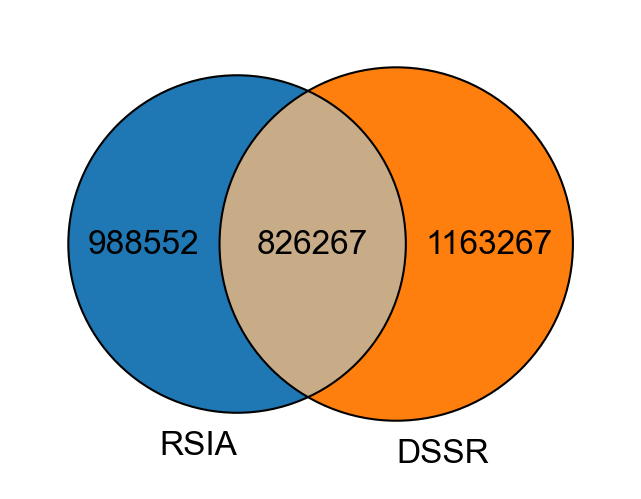

In [4]:
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=300)
in_our_db = len(df[df["in_our_db"] == True])
in_other_db = len(df[df["in_other_db"] == True])
overlap = len(df[(df["in_our_db"] == True) & (df["in_other_db"] == True)])
# print(in_our_db, in_other_db, overlap)
v = venn2(
    subsets=(in_our_db, in_other_db, overlap),
    set_labels=("RSIA", "DSSR"),
    set_colors=sns.color_palette()[0:2],
    alpha=1.0,  # Added alpha parameter to control opacity
)
c = venn2_circles(subsets=(in_our_db, in_other_db, overlap), linestyle="solid", lw=0.5)
# for text in v.set_labels:
#    text.set_color('white')
# for text in v.subset_labels:
#    text.set_color('white')
publication_style_ax(ax)

In [5]:
df["in_tc"] = df["in_tc"].fillna(False)

In [6]:
df["n_contained_in_motifs"] = df["contained_in_motifs"].apply(len)
df["n_overlapping_motifs"] = df["overlapping_motifs"].apply(len)

In [7]:
df_dssr = df.query("in_our_db == False").copy()
df_dssr["reason"] = ""
df_dssr.loc[
    (df_dssr["correct_n_strands"] == False) & (df_dssr["reason"] == ""), "reason"
] = "Incorrect number of strands"
df_dssr.loc[
    (df_dssr["correct_n_basepairs"] == False) & (df_dssr["reason"] == ""), "reason"
] = "Incorrect number of basepairs"
df_dssr.loc[
    (df_dssr["has_singlet_flank"] == True) & (df_dssr["reason"] == ""), "reason"
] = "Has singlet flank"
df_dssr.loc[(df_dssr["in_tc"] == True) & (df_dssr["reason"] == ""), "reason"] = (
    "In tertiary contact"
)
df_dssr.loc[
    (df_dssr["n_contained_in_motifs"] > 0) & (df_dssr["reason"] == ""), "reason"
] = "Contained in motif"
df_dssr.loc[
    (df_dssr["n_overlapping_motifs"] > 0) & (df_dssr["reason"] == ""), "reason"
] = "Combination of smaller motifs"

In [ ]:
df_dssr.query(
    "n_contained_in_motifs == 0 and in_tc == False and has_singlet_flank == False"
)

,pdb_id,motif,mtype,n_strands,n_basepairs,n_basepair_ends,n_residues,residues,correct_n_strands,correct_n_basepairs,has_singlet_flank,in_our_db,misclassified,in_other_db,overlapping_motifs,contained_in_motifs,in_tc,n_contained_in_motifs,n_overlapping_motifs,reason
37,8OZ0,HELIX-AUXUGC-XCGUAU-8OZ0-1,HELIX,2,6,2,12,"[W-A-25-, W-U-26-, W-A2M-27-, W-U-28-, W-G-29-...",True,True,False,False,False,True,"[TWOWAY-1-1-GCA-UAU-8OZ0-1, HELIX-5-AUXUG-CGUA...",[],False,0,3,Combination of smaller motifs
63,8OZ0,HELIX-ACC-XGU-8OZ0-1,HELIX,2,3,2,6,"[W-A-489-, W-C-490-, W-C-491-, W-OMG-509-, W-G...",True,True,False,False,False,True,[NWAY-9-9-6-CAAAGAUUAAG-CGCGCXAAUUA-UAGUGAXG-8...,[],False,0,2,Combination of smaller motifs
164,8OZ0,TWOWAY-GG-CCC-8OZ0-1,TWOWAY,2,4,2,5,"[W-G-534-, W-G-535-, W-C-548-, W-C-549-, W-C-5...",True,True,False,False,False,True,"[HELIX-6-CCUGUA-UACAGG-8OZ0-1, HAIRPIN-13-GACU...",[],False,0,2,Combination of smaller motifs
290,8OZ0,SSTRAND-C-C-8OZ0-1,SSTRAND,2,0,0,2,"[W-C-131-, W-C-139-]",False,True,False,False,False,True,"[SSTRAND-1-C-8OZ0-1, SSTRAND-5-CUACU-8OZ0-1]",[],False,0,2,Incorrect number of strands
294,8OZ0,SSTRAND-AG-U-8OZ0-1,SSTRAND,2,1,1,3,"[W-A-224-, W-G-225-, W-U-287-]",False,False,False,False,False,True,"[SSTRAND-2-AG-8OZ0-1, SSTRAND-1-U-8OZ0-1]",[],False,0,2,Incorrect number of strands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325343,5HCP,SSTRAND-G-U-5HCP-1,SSTRAND,2,0,0,2,"[1a-G-78-, 1a-U-86-]",False,True,False,False,False,True,"[SSTRAND-1-G-5HCP-3, SSTRAND-1-U-5HCP-2]",[],False,0,2,Incorrect number of strands
1325344,5HCP,SSTRAND-U-CG-5HCP-1,SSTRAND,2,0,0,3,"[1a-U-339-, 1a-C-341-, 1a-G-342-]",False,True,False,False,False,True,"[SSTRAND-1-U-5HCP-3, SSTRAND-2-CG-5HCP-1]",[],False,0,2,Incorrect number of strands
1325367,5HCP,SSTRAND-G-C-5HCP-1,SSTRAND,2,0,0,2,"[2A-G-1579-, 2A-C-1582-]",False,True,False,False,False,True,"[SSTRAND-1-G-5HCP-5, SSTRAND-1-C-5HCP-3]",[],False,0,2,Incorrect number of strands
1325382,5HCP,SSTRAND-UC-5HCP-1,SSTRAND,1,0,0,2,"[2B-U-1-, 2B-C-2-]",True,True,False,False,False,True,"[SSTRAND-1-U-5HCP-5, HELIX-10-CCCCCGUGCC-GGUGC...",[],False,0,2,Combination of smaller motifs


In [9]:
df_test = df.query("in_tc == True").copy()
print(df_test["motif"].values)

['HELIX-UCC-GGA-8OZ0-1' 'HELIX-GG-CC-8OZ0-3' 'HELIX-UU-AA-8OZ0-1' ...
 'SSTRAND-GC-5HCP-1' 'SSTRAND-GU-5HCP-2' 'SSTRAND-A-5HCP-12']


In [10]:
row = df_test.query("motif == 'HELIX-CAGGGU-GCCCUG-2HO6-1'").iloc[0]
row["overlapping_motifs"]

['HAIRPIN-12-AGGGCAGGGUUUAU-2HO6-1', 'SSTRAND-9-GGUGCCCUG-2HO6-1']

In [11]:
df_test = df.query("correct_n_basepairs == False")
# Filter out motifs containing 'X' in their sequence
# df_test = df_test[~df_test["motif"].str.contains("X")]
df_test[["motif", "n_basepair_ends"]]

,motif,n_basepair_ends
52,HELIX-GG-CU-8OZ0-1,1
294,SSTRAND-AG-U-8OZ0-1,1
303,SSTRAND-G-C-8OZ0-1,1
721,NWAY-CUAUGGCUAUG-UACCAA-2OGM-1,2
747,TWOWAY-UCA-UA-2OGM-1,1
...,...,...
1323217,NWAY-CAUGGACG-CUCCAG-8VTU-2,2
1323864,SSTRAND-C-AG-8VTU-1,1
1324718,NWAY-CAUGGACG-CUCCAG-5HCP-1,2
1324720,NWAY-CAUGGACG-CUCCAG-5HCP-2,2


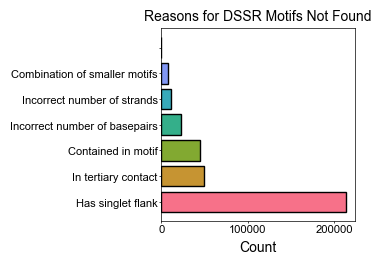

In [11]:
# Get value counts and sort in descending order
reason_counts = df_dssr["reason"].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(2.5, 2.5))

# Create horizontal bar plot with different colors
colors = sns.color_palette("husl", n_colors=len(reason_counts))
bars = ax.barh(
    range(len(reason_counts)), reason_counts.values, color=colors, edgecolor="black"
)

# Customize plot
ax.set_yticks(range(len(reason_counts)))
ax.set_yticklabels(reason_counts.index)
ax.set_xlabel("Count")
ax.set_title("Reasons for DSSR Motifs Not Found")
ax.tick_params(axis="y", length=0)

publication_style_ax(ax)

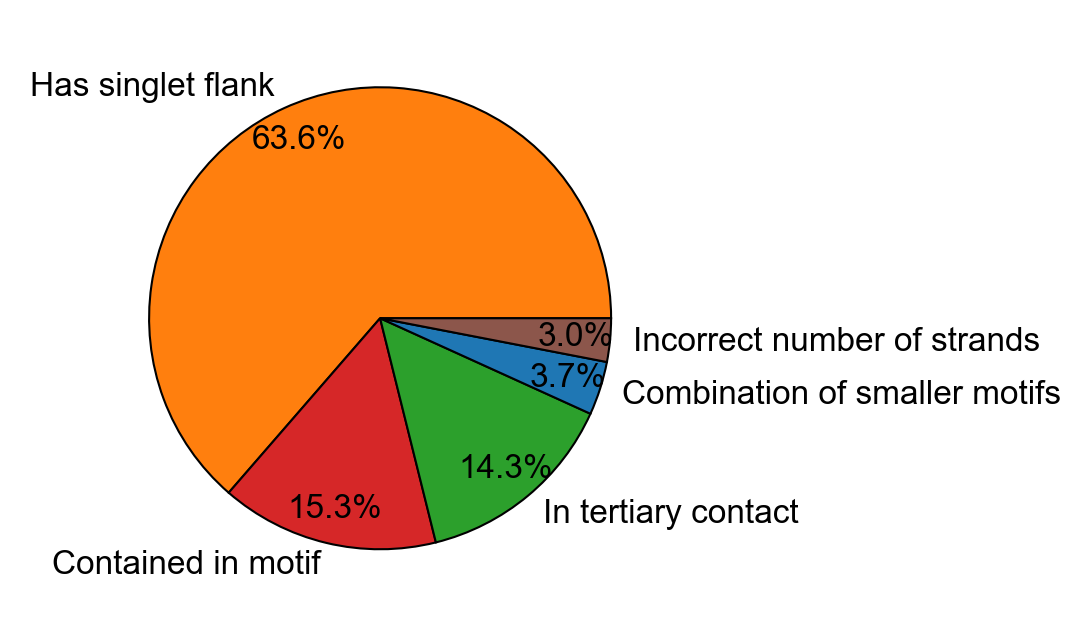

In [12]:
# Get value counts and sort in descending order
reason_counts = df_dssr["reason"].value_counts()

# Filter out values less than 0.2%
total = reason_counts.sum()
reason_counts = reason_counts[reason_counts / total >= 0.02]

# Create figure and axis
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=300)

# Create pie chart with colors matching the figure
colors = [
    "#ff7f0e",  # Orange for "Has singlet flank",
    "#d62728",  # Red for "In tertiary contact",
    "#2ca02c",  # Green for "Contained in motif"
    "#1f77b4",  # Blue for "Incorrect number of strands"
    sns.color_palette()[5],
    sns.color_palette()[6],
]  # Purple for "Other"


wedges, texts, autotexts = ax.pie(
    reason_counts.values,
    labels=reason_counts.index,
    colors=colors,
    autopct="%1.1f%%",
    pctdistance=0.85,
    wedgeprops=dict(edgecolor="black", linewidth=0.5),
)

# Customize plot
plt.setp(autotexts, size=6, fontname="Arial")
plt.setp(texts, size=6, fontname="Arial")

publication_style_ax(ax)

In [69]:
print(df_dssr["reason"].value_counts())

Has singlet flank                207160
Incorrect number of basepairs     98601
In tertiary contact               45634
Contained in motifs               37763
Incorrect number of strands       10801
Overlapping motifs                 6494
Name: reason, dtype: int64


In [54]:
df_dssr["correct_n_strands"].value_counts()

True     395652
False     10801
Name: correct_n_strands, dtype: int64

In [55]:
df_dssr["correct_n_basepairs"].value_counts()

True     306183
False    100270
Name: correct_n_basepairs, dtype: int64

In [56]:
df_dssr["has_singlet_flank"].value_counts()

True     237579
False    168874
Name: has_singlet_flank, dtype: int64

In [57]:
df_dssr["in_tc"].value_counts()

0.0    243664
1.0    162789
Name: in_tc, dtype: int64

In [58]:
df_dssr["n_contained_in_motifs"].value_counts()

1    295343
0    111110
Name: n_contained_in_motifs, dtype: int64

In [59]:
df_dssr_no_explained = df_dssr.query(
    "correct_n_strands == True and correct_n_basepairs == True and has_singlet_flank == False and in_tc == False and n_contained_in_motifs == 0"
).copy()

In [60]:
len(df_dssr_no_explained)

6494

In [61]:
df_dssr_no_explained["mtype"].value_counts()

HELIX      4969
TWOWAY     1065
HAIRPIN     225
NWAY        131
SSTRAND     104
Name: mtype, dtype: int64

In [63]:
df_dssr_no_explained["n_overlapping_motifs"].value_counts()

4     2165
2     1686
3     1683
5      889
6       41
7       24
13       4
9        1
8        1
Name: n_overlapping_motifs, dtype: int64

In [62]:
for i, row in df_dssr_no_explained.iterrows():
    print(row)
    break

pdb_id                                                                8P18
motif                                         HELIX-UGUGGAC-GUCUGCA-8P18-1
mtype                                                                HELIX
n_strands                                                                2
n_basepairs                                                              7
n_basepair_ends                                                          2
n_residues                                                              14
residues                 [1-U-2137-, 1-G-2138-, 1-U-2139-, 1-G-2140-, 1...
correct_n_strands                                                     True
correct_n_basepairs                                                   True
has_singlet_flank                                                    False
found                                                                False
misclassified                                                        False
missing                  